In [1]:
from astropy.table import Table
from astropy.io import fits
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt

import scipy.stats
import scipy.optimize

In [13]:
xipoles_sv3_bright = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/smu/xipoles_BGS_BRIGHT_NScomb_0.1_0.5_default_log1_njack60_nran4_split20.txt')
xipoles_sv3_any = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18/smu/xipoles_BGS_ANY_NScomb_0.1_0.5_default_log2_njack60_nran4_split20.txt')

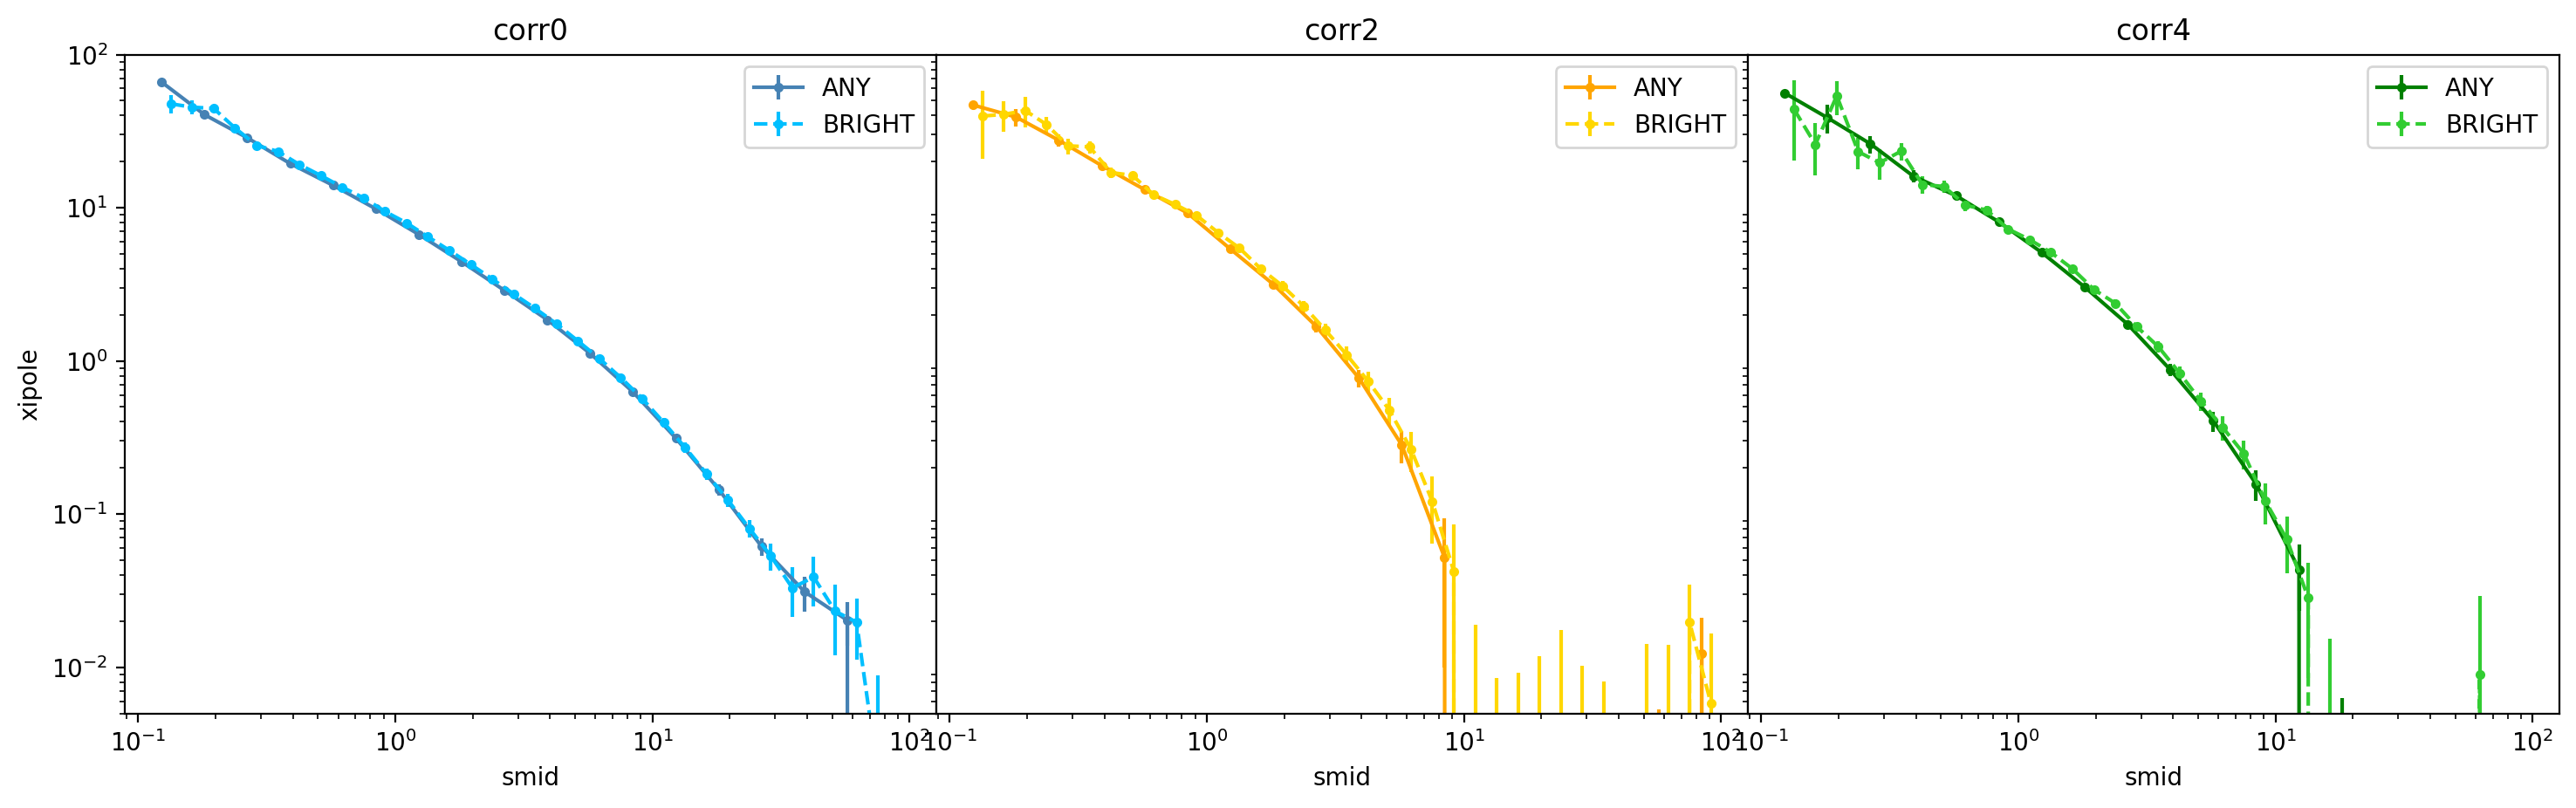

In [22]:
fig, ax = plt.subplots(figsize=(18,5),dpi=200)

ax1 = plt.subplot(131)
plt.title('corr0')
ax1.errorbar(xipoles_sv3_any[:,0], xipoles_sv3_any[:,2], yerr=xipoles_sv3_any[:,5], marker='o', markersize=3, label='ANY', color='steelblue')
ax1.errorbar(xipoles_sv3_bright[:,0], xipoles_sv3_bright[:,2], yerr=xipoles_sv3_bright[:,5], marker='o', markersize=3, label='BRIGHT', color='deepskyblue', ls='--')
plt.xlabel('smid')
plt.ylabel('xipole')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.ylim(5*10**-3, 10**2)
plt.legend()

ax2 = plt.subplot(132)
plt.title('corr2')
ax2.errorbar(xipoles_sv3_any[:,0], xipoles_sv3_any[:,3], yerr=xipoles_sv3_any[:,6], marker='o', markersize=3, label='ANY', color='orange')
ax2.errorbar(xipoles_sv3_bright[:,0], xipoles_sv3_bright[:,3], yerr=xipoles_sv3_bright[:,6], marker='o', markersize=3, label='BRIGHT', color='gold', ls='--')
plt.xlabel('smid')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yticks([])
plt.ylim(5*10**-3, 10**2)
plt.legend()

ax3 = plt.subplot(133)
plt.title('corr4')
ax3.errorbar(xipoles_sv3_any[:,0], xipoles_sv3_any[:,4], yerr=xipoles_sv3_any[:,7], marker='o', markersize=3, label='ANY', color='green')
ax3.errorbar(xipoles_sv3_bright[:,0], xipoles_sv3_bright[:,4], yerr=xipoles_sv3_bright[:,7], marker='o', markersize=3, label='BRIGHT', color='limegreen', ls='--')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yticks([])
plt.ylim(5*10**-3, 10**2)
plt.xlabel('smid')
plt.legend()

plt.subplots_adjust(wspace=0)
plt.savefig('../figures/week8/sv3_xipoles_ANY_BRIGHT.png')

In [15]:
wp_sv3_bright = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/wp_BGS_BRIGHT_NScomb_0.1_0.5_default_log2_njack60_nran4_split20.txt')
wp_sv3_any = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18/rppi/wp_BGS_ANY_NScomb_0.1_0.5_default_log2_njack60_nran4_split20.txt')

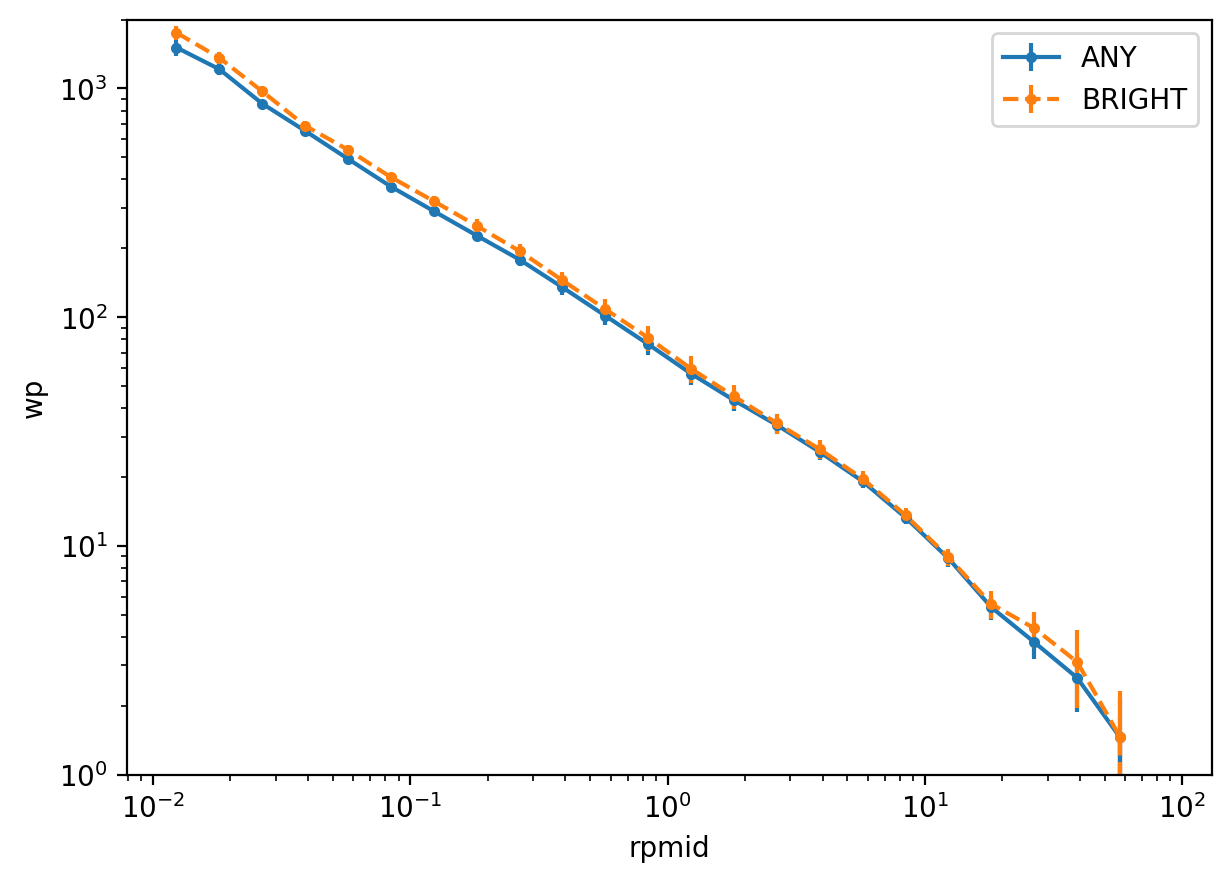

In [23]:
fig, ax1 = plt.subplots(figsize=(7,5), dpi=200)

ax1.errorbar(wp_sv3_any[:,0], wp_sv3_any[:,2], yerr=wp_sv3_any[:,3], marker='o', markersize=3, label='ANY')
ax1.errorbar(wp_sv3_bright[:,0], wp_sv3_bright[:,2], yerr=wp_sv3_bright[:,3], marker='o', markersize=3, label='BRIGHT', ls='--')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.ylim(1,2*10**3)
plt.ylabel('wp')
plt.xlabel('rpmid')
plt.legend()
plt.savefig('../figures/week8/sv3_wp_ANY_BRIGHT.png')

In [24]:
wp_sv3_bright_N = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/wp_BGS_BRIGHT_N_0.1_0.5_default_log2_njack60_nran4_split20.txt')
wp_sv3_bright_S = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/wp_BGS_BRIGHT_S_0.1_0.5_default_log2_njack60_nran4_split20.txt')
wp_sv3_any_N = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18/rppi/wp_BGS_ANY_N_0.1_0.5_default_log2_njack60_nran4_split20.txt')
wp_sv3_any_S = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18/rppi/wp_BGS_ANY_S_0.1_0.5_default_log2_njack60_nran4_split20.txt')

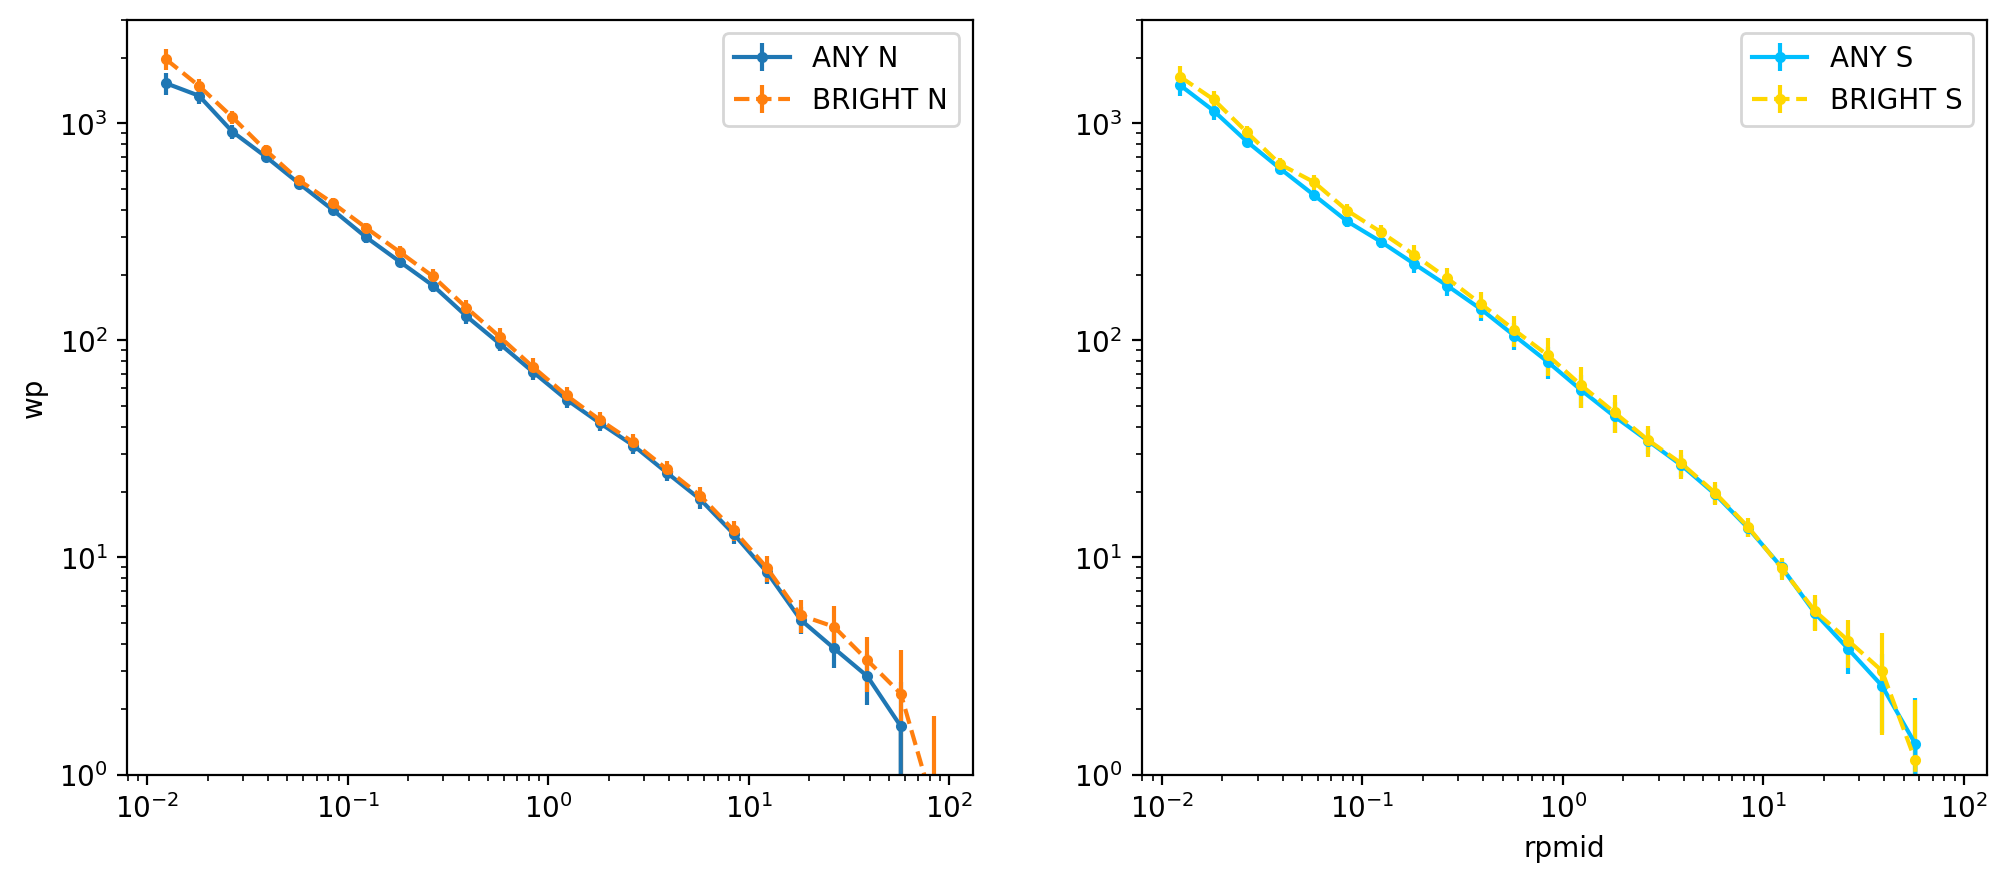

In [31]:
fig, ax = plt.subplots(figsize=(12,5), dpi=200)

ax1 = plt.subplot(121)
ax1.errorbar(wp_sv3_any_N[:,0], wp_sv3_any_N[:,2], yerr=wp_sv3_any_N[:,3], marker='o', markersize=3, label='ANY N', color='tab:blue')
ax1.errorbar(wp_sv3_bright_N[:,0], wp_sv3_bright_N[:,2], yerr=wp_sv3_bright_N[:,3], marker='o', markersize=3, label='BRIGHT N', ls='--', color='tab:orange')
plt.ylim(1,3*10**3)
plt.ylabel('wp')
plt.legend()

ax2 = plt.subplot(122)
ax2.errorbar(wp_sv3_any_S[:,0], wp_sv3_any_S[:,2], yerr=wp_sv3_any_S[:,3], marker='o', markersize=3, label='ANY S', color='deepskyblue')
ax2.errorbar(wp_sv3_bright_S[:,0], wp_sv3_bright_S[:,2], yerr=wp_sv3_bright_S[:,3], marker='o', markersize=3, label='BRIGHT S', ls='--', color='gold')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.ylim(1,3*10**3)

plt.xlabel('rpmid')

plt.legend()
plt.savefig('../figures/week8/sv3_wp_NS_BRIGHT_ANY.png')